<ipython-input-1-831c040fd5c4>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-1-831c040fd5c4>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-1-831c040fd5c4>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-1-831c040fd5c4>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
<ipython-input-1-831c040fd5c4>:27: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() o

Basic Statistics for Combined Data:
                                Date  Temperature  Precipitation  Wind Speed
count                            141   141.000000     141.000000  141.000000
mean   2021-02-19 09:11:29.361702144    24.370213       1.284397    2.443972
min              2019-02-01 00:00:00    20.100000       0.000000    0.000000
25%              2020-02-10 00:00:00    23.600000       0.000000    1.200000
50%              2021-02-15 00:00:00    24.500000       0.000000    2.100000
75%              2022-02-21 00:00:00    25.200000       0.100000    3.200000
max              2023-02-28 00:00:00    27.100000      44.400000   10.600000
std                              NaN     1.235299       5.484137    1.973734

Average Temperature in February: 24.37°C
Average Precipitation in February: 1.28mm
Average Wind Speed in February: 2.44 km/h


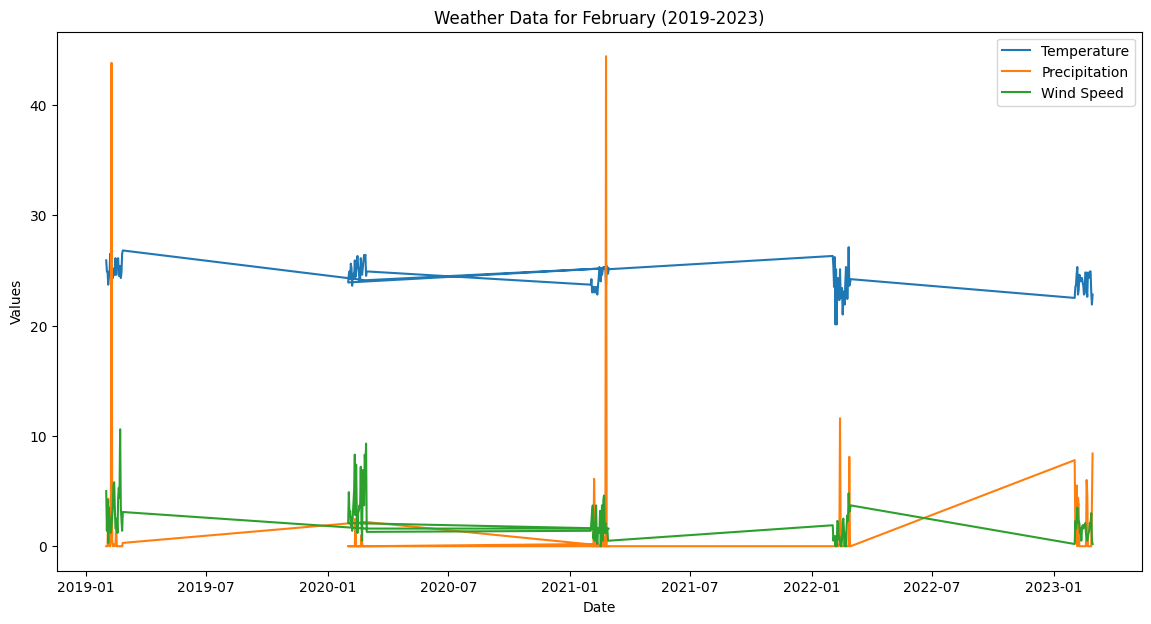


Model Summary:
                            OLS Regression Results                            
Dep. Variable:            Temperature   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.160
Method:                 Least Squares   F-statistic:                     14.31
Date:                Tue, 30 Jul 2024   Prob (F-statistic):           2.25e-06
Time:                        09:18:30   Log-Likelihood:                -216.08
No. Observations:                 141   AIC:                             438.2
Df Residuals:                     138   BIC:                             447.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            23.8027      

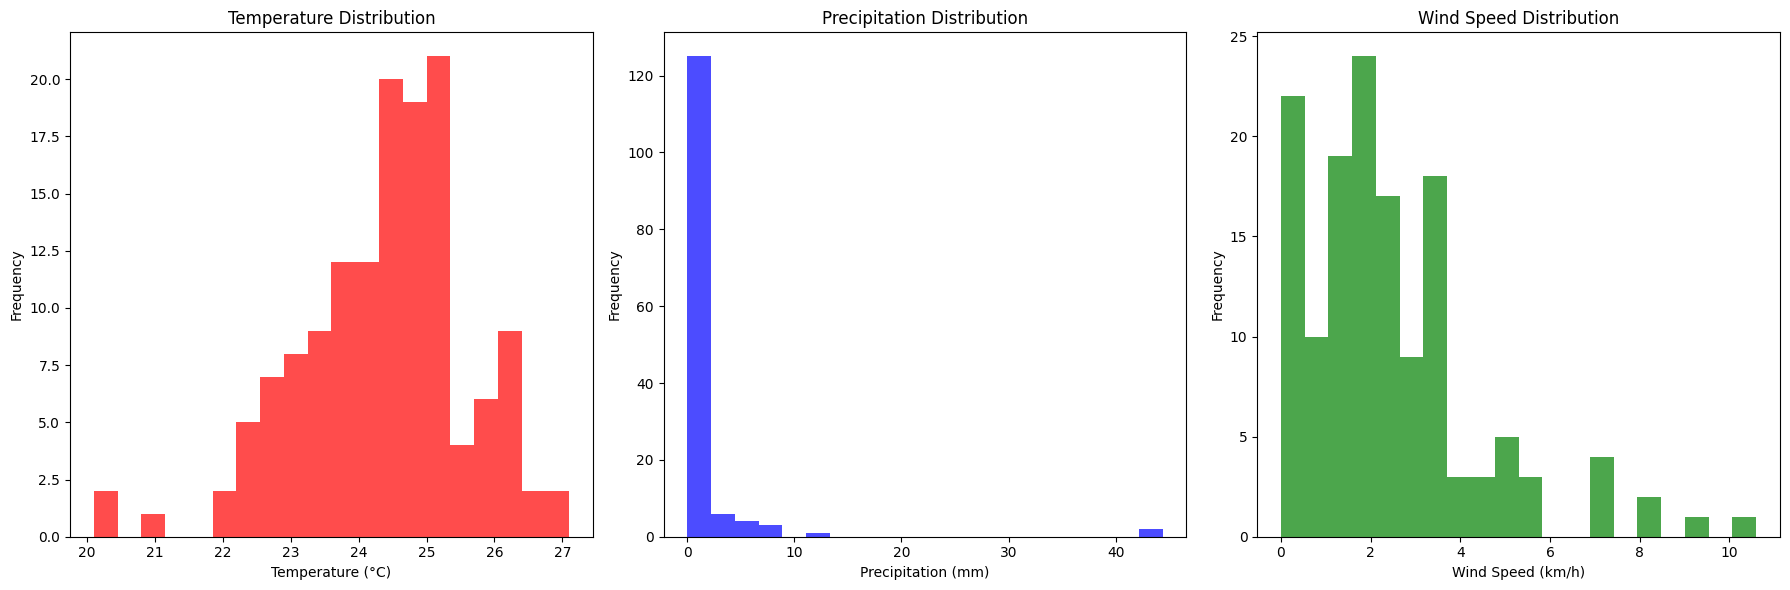

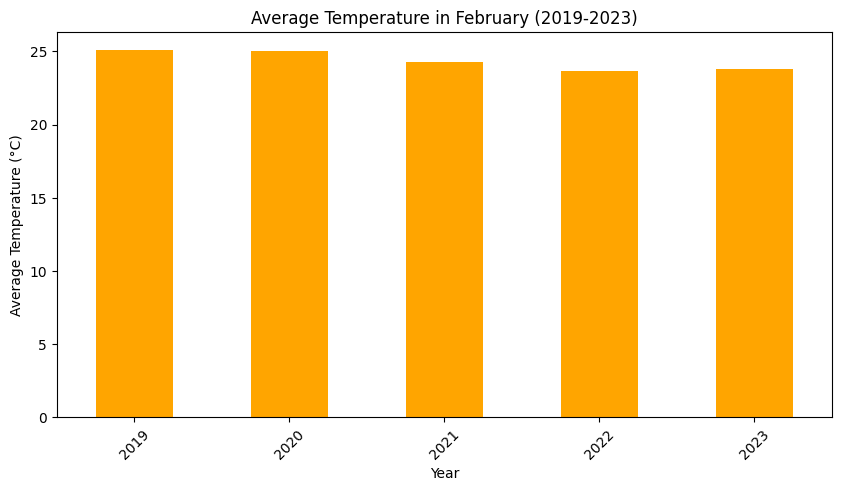

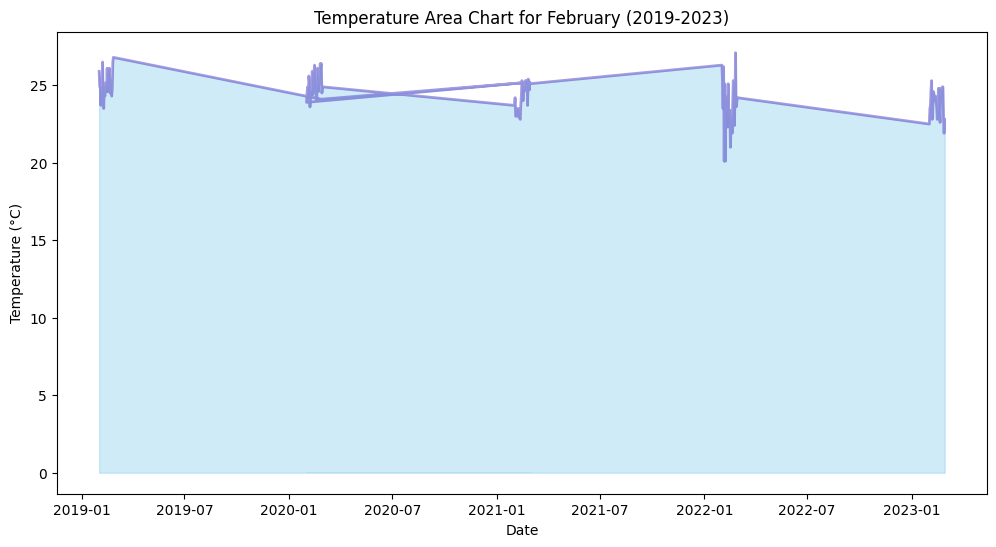

/usr/local/lib/python3.10/dist-packages/_plotly_utils/basevalidators.py:105: FutureWarning:

The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result



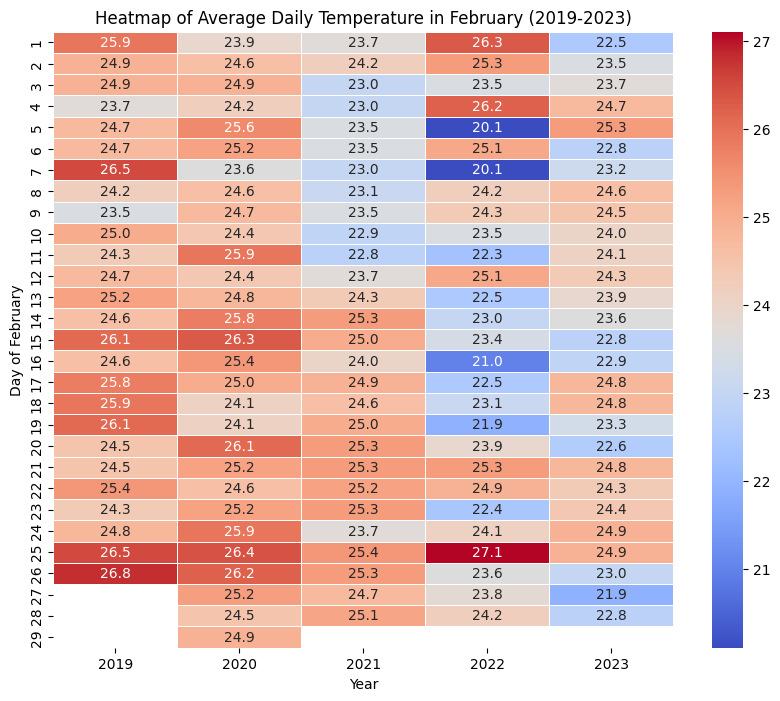

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go

# Load data for each year with encoding (February data)
feb_2019 = pd.read_csv('/content/2019february.csv', encoding='ISO-8859-1')
feb_2020 = pd.read_csv('/content/2020february.csv', encoding='ISO-8859-1')
feb_2021 = pd.read_csv('/content/2021february.csv', encoding='ISO-8859-1')
feb_2022 = pd.read_csv('/content/2022february.csv', encoding='ISO-8859-1')
feb_2023 = pd.read_csv('/content/2023february.csv', encoding='ISO-8859-1')

# Data Cleaning: Ensure consistency in column names and handle missing values
def clean_data(df):

    df.rename(columns={'Date\xa0': 'Date'}, inplace=True)


    df = df[['Date', 'Temperature', 'Precipitation', 'Wind Speed']]

    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')


    df.fillna(method='ffill', inplace=True)
    return df

feb_2019 = clean_data(feb_2019)
feb_2020 = clean_data(feb_2020)
feb_2021 = clean_data(feb_2021)
feb_2022 = clean_data(feb_2022)
feb_2023 = clean_data(feb_2023)

# Combine Data: Merge all the data into a single DataFrame
combined_data = pd.concat([feb_2019, feb_2020, feb_2021, feb_2022, feb_2023])

# Basic Statistics: Get a summary of the combined data
print("Basic Statistics for Combined Data:")
print(combined_data.describe())

# Summarize Climate: Calculate average values for February across the years
avg_temp = combined_data['Temperature'].mean()
avg_precip = combined_data['Precipitation'].mean()
avg_wind_speed = combined_data['Wind Speed'].mean()

print(f'\nAverage Temperature in February: {avg_temp:.2f}°C')
print(f'Average Precipitation in February: {avg_precip:.2f}mm')
print(f'Average Wind Speed in February: {avg_wind_speed:.2f} km/h')

# Visualize Data: Plot the data to compare trends over the years
plt.figure(figsize=(14, 7))

# Plot temperature
plt.plot(combined_data['Date'], combined_data['Temperature'], label='Temperature')

# Plot precipitation
plt.plot(combined_data['Date'], combined_data['Precipitation'], label='Precipitation')

# Plot wind speed
plt.plot(combined_data['Date'], combined_data['Wind Speed'], label='Wind Speed')

plt.xlabel('Date')
plt.ylabel('Values')
plt.title('Weather Data for February (2019-2023)')
plt.legend()
plt.show()

# Model Creation: Fit a model to predict temperature based on other features
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Prepare data for statsmodels
X = combined_data[['Precipitation', 'Wind Speed']]
y = combined_data['Temperature']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the model
model = sm.OLS(y, X).fit()

# Print the summary including p-values
print("\nModel Summary:")
print(model.summary())

# Evaluate the model using sklearn
X_train, X_test, y_train, y_test = train_test_split(X[['Precipitation', 'Wind Speed']], y, test_size=0.2, random_state=42)
sklearn_model = LinearRegression()
sklearn_model.fit(X_train, y_train)
y_pred = sklearn_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print(f'\nMean Squared Error: {mse:.2f}')

# Model Coefficients
print(f'Coefficients: {sklearn_model.coef_}')
print(f'Intercept: {sklearn_model.intercept_}')

# Plot combined histograms for Temperature, Precipitation, and Wind Speed
plt.figure(figsize=(18, 6))

# Temperature Histogram
plt.subplot(1, 3, 1)
plt.hist(combined_data['Temperature'], bins=20, alpha=0.7, color='r')
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')

# Precipitation Histogram
plt.subplot(1, 3, 2)
plt.hist(combined_data['Precipitation'], bins=20, alpha=0.7, color='b')
plt.title('Precipitation Distribution')
plt.xlabel('Precipitation (mm)')
plt.ylabel('Frequency')

# Wind Speed Histogram
plt.subplot(1, 3, 3)
plt.hist(combined_data['Wind Speed'], bins=20, alpha=0.7, color='g')
plt.title('Wind Speed Distribution')
plt.xlabel('Wind Speed (km/h)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Additional Plot: Average Temperature over Years
average_temp_per_year = combined_data.groupby(combined_data['Date'].dt.year)['Temperature'].mean()
plt.figure(figsize=(10, 5))
average_temp_per_year.plot(kind='bar', color='orange')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.title('Average Temperature in February (2019-2023)')
plt.xticks(rotation=45)
plt.show()

# Area Chart
plt.figure(figsize=(12, 6))
plt.fill_between(combined_data['Date'], combined_data['Temperature'], color="skyblue", alpha=0.4)
plt.plot(combined_data['Date'], combined_data['Temperature'], color="Slateblue", alpha=0.6, linewidth=2)
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.title('Temperature Area Chart for February (2019-2023)')
plt.show()

# Candlestick Chart using Plotly
fig = go.Figure()

# Add traces for candlestick chart
fig.add_trace(go.Candlestick(
    x=combined_data['Date'],
    open=combined_data['Temperature'],
    high=combined_data['Temperature'] + combined_data['Precipitation'],
    low=combined_data['Temperature'] - combined_data['Precipitation'],
    close=combined_data['Temperature'],
    name='Weather Data'
))

fig.update_layout(
    title='Candlestick Chart of Weather Data for February (2019-2023)',
    xaxis_title='Date',
    yaxis_title='Temperature (°C)'
)

fig.show()

# Heatmap
plt.figure(figsize=(10, 8))
heatmap_data = combined_data.pivot_table(index=combined_data['Date'].dt.day, columns=combined_data['Date'].dt.year,
                                         values='Temperature', aggfunc='mean')
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
plt.title('Heatmap of Average Daily Temperature in February (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Day of February')
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go

# Load data for each year with encoding (February data)
feb_2019 = pd.read_csv('/content/2019february.csv', encoding='ISO-8859-1')
feb_2020 = pd.read_csv('/content/2020february.csv', encoding='ISO-8859-1')
feb_2021 = pd.read_csv('/content/2021february.csv', encoding='ISO-8859-1')
feb_2022 = pd.read_csv('/content/2022february.csv', encoding='ISO-8859-1')
feb_2023 = pd.read_csv('/content/2023february.csv', encoding='ISO-8859-1')

print(feb_2019.columns)


Index(['Date ', 'Temperature', 'Precipitation', 'Wind Speed'], dtype='object')


February report generated and saved.


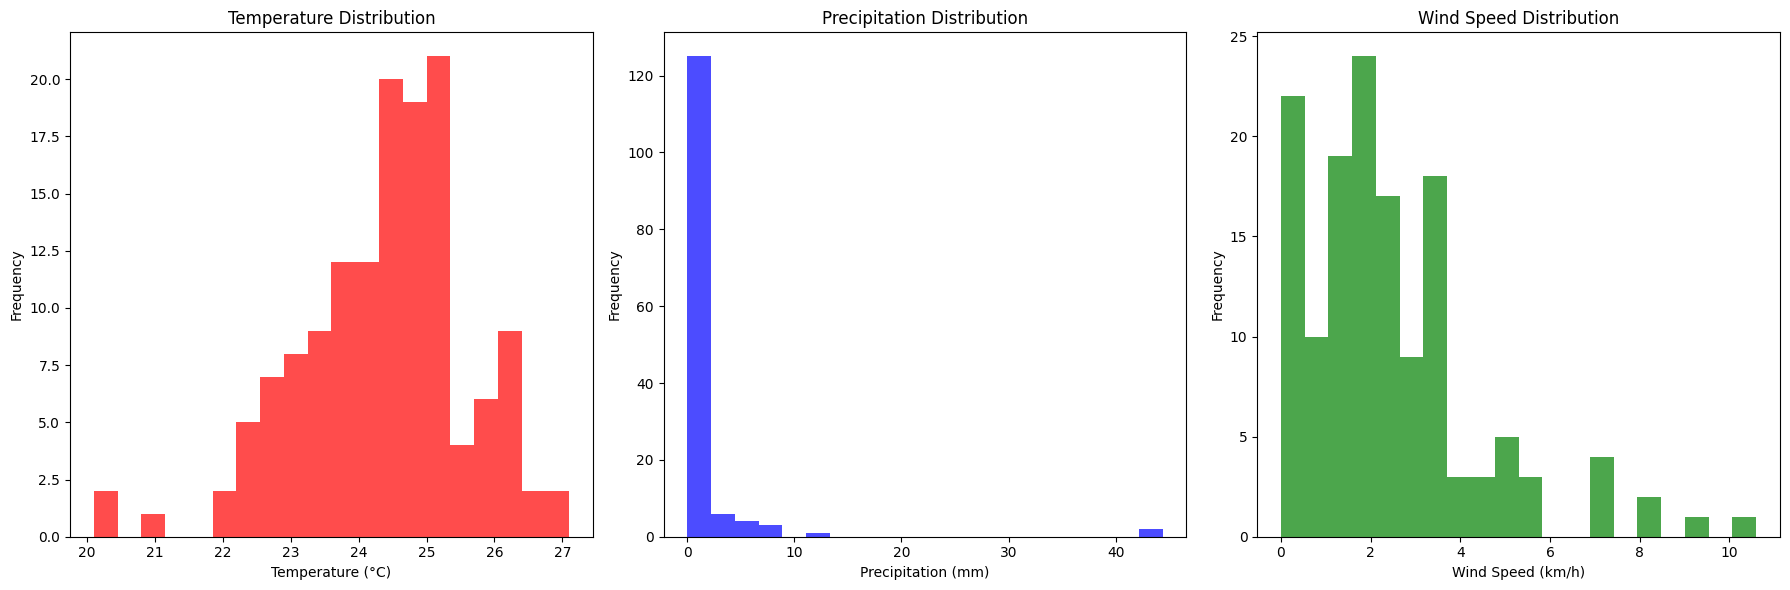

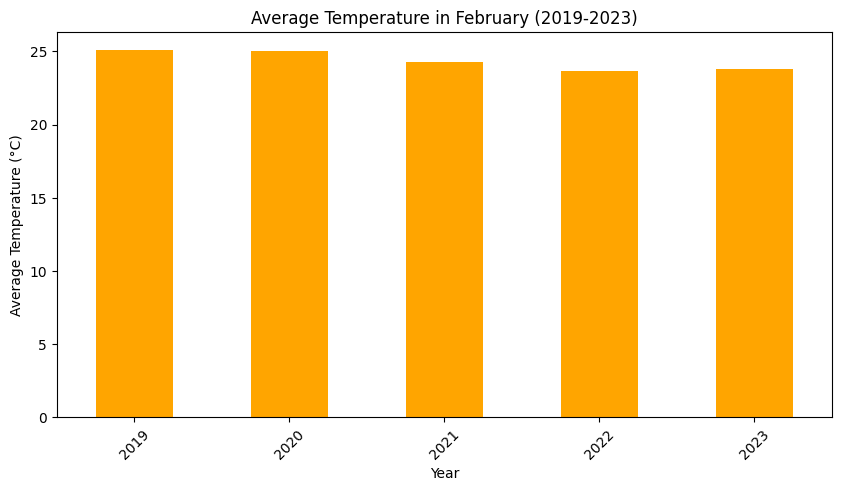

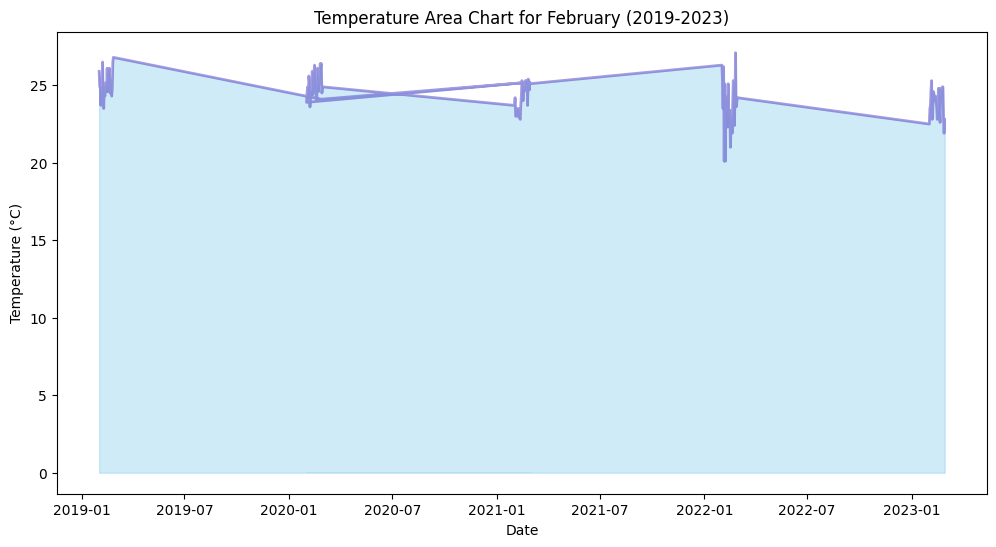

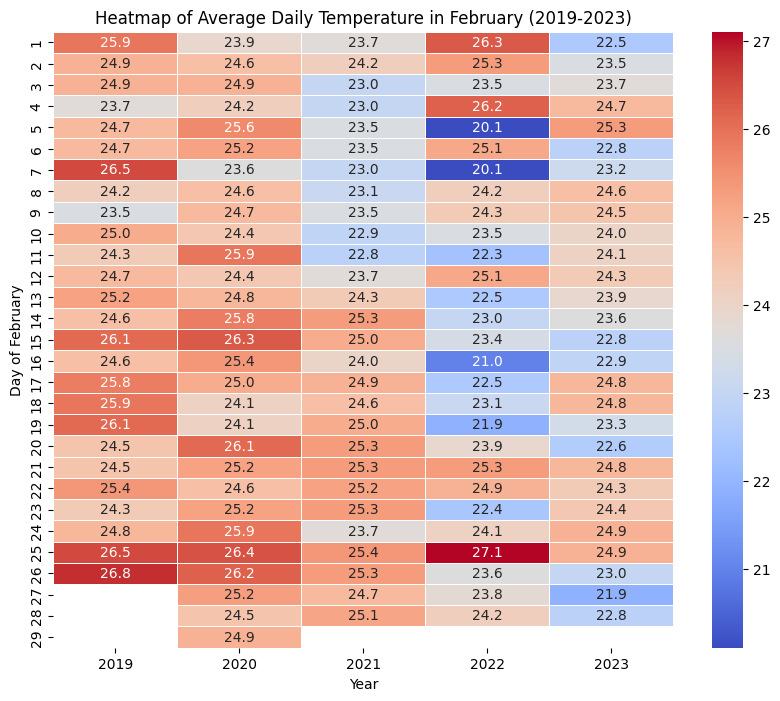

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.graph_objects as go
from matplotlib.backends.backend_pdf import PdfPages

# Load and clean data
def clean_data(df):
    df.rename(columns={'Date\xa0': 'Date'}, inplace=True)
    df = df[['Date', 'Temperature', 'Precipitation', 'Wind Speed']]
    df.fillna(method='ffill', inplace=True)
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')
    return df

# Process February data
def process_february():
    # File paths for February
    file_paths = [
        '/content/2019february.csv', '/content/2020february.csv', '/content/2021february.csv',
        '/content/2022february.csv', '/content/2023february.csv'
    ]

    # Load data
    data_frames = [pd.read_csv(path, encoding='ISO-8859-1') for path in file_paths]

    # Clean data
    cleaned_data = [clean_data(df) for df in data_frames]

    # Combine data
    combined_data = pd.concat(cleaned_data)

    # Create a PdfPages object to save multiple plots to a single PDF
    pdf_pages = PdfPages('february_weather_analysis_report.pdf')

    # Save Basic Statistics to a CSV file
    basic_stats = combined_data.describe()
    basic_stats.to_csv('february_basic_statistics.csv')

    # Save Model Summary to a text file
    X = combined_data[['Precipitation', 'Wind Speed']]
    y = combined_data['Temperature']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    model_summary = model.summary().as_text()
    with open('february_model_summary.txt', 'w') as f:
        f.write(model_summary)

    # Plot Histograms
    plt.figure(figsize=(18, 6))
    plt.subplot(1, 3, 1)
    plt.hist(combined_data['Temperature'], bins=20, alpha=0.7, color='r')
    plt.title('Temperature Distribution')
    plt.xlabel('Temperature (°C)')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 2)
    plt.hist(combined_data['Precipitation'], bins=20, alpha=0.7, color='b')
    plt.title('Precipitation Distribution')
    plt.xlabel('Precipitation (mm)')
    plt.ylabel('Frequency')

    plt.subplot(1, 3, 3)
    plt.hist(combined_data['Wind Speed'], bins=20, alpha=0.7, color='g')
    plt.title('Wind Speed Distribution')
    plt.xlabel('Wind Speed (km/h)')
    plt.ylabel('Frequency')

    plt.tight_layout()
    pdf_pages.savefig()

    # Plot Average Temperature per Year
    average_temp_per_year = combined_data.groupby(combined_data['Date'].dt.year)['Temperature'].mean()
    plt.figure(figsize=(10, 5))
    average_temp_per_year.plot(kind='bar', color='orange')
    plt.xlabel('Year')
    plt.ylabel('Average Temperature (°C)')
    plt.title('Average Temperature in February (2019-2023)')
    plt.xticks(rotation=45)
    pdf_pages.savefig()

    # Plot Area Chart
    plt.figure(figsize=(12, 6))
    plt.fill_between(combined_data['Date'], combined_data['Temperature'], color="skyblue", alpha=0.4)
    plt.plot(combined_data['Date'], combined_data['Temperature'], color="Slateblue", alpha=0.6, linewidth=2)
    plt.xlabel('Date')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Area Chart for February (2019-2023)')
    pdf_pages.savefig()

    # Candlestick Chart using Plotly (save as HTML)
    fig = go.Figure()
    fig.add_trace(go.Candlestick(
        x=combined_data['Date'],
        open=combined_data['Temperature'],
        high=combined_data['Temperature'] + combined_data['Precipitation'],
        low=combined_data['Temperature'] - combined_data['Precipitation'],
        close=combined_data['Temperature'],
        name='Weather Data'
    ))
    fig.update_layout(
        title='Candlestick Chart of Weather Data for February (2019-2023)',
        xaxis_title='Date',
        yaxis_title='Temperature (°C)'
    )
    fig.write_html('february_candlestick_chart.html')

    # Plot Heatmap
    plt.figure(figsize=(10, 8))
    heatmap_data = combined_data.pivot_table(index=combined_data['Date'].dt.day, columns=combined_data['Date'].dt.year,
                                             values='Temperature', aggfunc='mean')
    sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".1f", linewidths=0.5)
    plt.title('Heatmap of Average Daily Temperature in February (2019-2023)')
    plt.xlabel('Year')
    plt.ylabel('Day of February')
    pdf_pages.savefig()

    # Close the PdfPages object
    pdf_pages.close()

# Process February
process_february()

print("February report generated and saved.")
